In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
import graphviz
from sklearn import tree

In [84]:
data=pd.read_csv("lab5_george_dataset.csv")
data.head()

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes


In [85]:
data

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [86]:
X=data.iloc[:,:4]
y=data.iloc[:,4]
print(X)
print(y)

        age  income student credit_rating
0      <=30    high      no          fair
1      <=30    high      no     excellent
2   31...40    high      no          fair
3       >40  medium      no          fair
4       >40     low     yes          fair
5       >40     low     yes     excellent
6   31...40     low     yes     excellent
7      <=30  medium      no          fair
8      <=30     low     yes          fair
9       >40  medium     yes          fair
10     <=30  medium     yes     excellent
11  31...40  medium      no     excellent
12  31...40    high     yes          fair
13      >40  medium      no     excellent
0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: buys_computer, dtype: object


In [87]:
le=preprocessing.LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [88]:
data['buys_computer'].replace("no",'0',inplace=True)
data['buys_computer'].replace("yes",'1',inplace=True)
data['credit_rating'].replace("fair",'0',inplace=True)
data['credit_rating'].replace("excellent",'1',inplace=True)
data['student'].replace("no",'0',inplace=True)
data['student'].replace("yes",'1',inplace=True)
data['income'].replace("low",'0',inplace=True)
data['income'].replace("medium",'1',inplace=True)
data['income'].replace("high",'2',inplace=True)
data['age'].replace("<=30",'0',inplace=True)
data['age'].replace("31...40",'1',inplace=True)
data['age'].replace(">40",'2',inplace=True)
print(data)

   age income student credit_rating buys_computer
0    0      2       0             0             0
1    0      2       0             1             0
2    1      2       0             0             1
3    2      1       0             0             1
4    2      0       1             0             1
5    2      0       1             1             0
6    1      0       1             1             1
7    0      1       0             0             0
8    0      0       1             0             1
9    2      1       1             0             1
10   0      1       1             1             1
11   1      1       0             1             1
12   1      2       1             0             1
13   2      1       0             1             0


In [89]:
X=data.iloc[:,:4]
y=data.iloc[:,4]
print(X)
print(y)

   age income student credit_rating
0    0      2       0             0
1    0      2       0             1
2    1      2       0             0
3    2      1       0             0
4    2      0       1             0
5    2      0       1             1
6    1      0       1             1
7    0      1       0             0
8    0      0       1             0
9    2      1       1             0
10   0      1       1             1
11   1      1       0             1
12   1      2       1             0
13   2      1       0             1
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: buys_computer, dtype: object


[Text(0.4444444444444444, 0.9, 'X[2] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2222222222222222, 0.7, 'X[0] <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.1111111111111111, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2222222222222222, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.3, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.7, 'X[3] <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5555555555555556, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7777777777777778, 0.5, 'X[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6666666666666666, 0.3, 'entropy = 0.0\nsamples

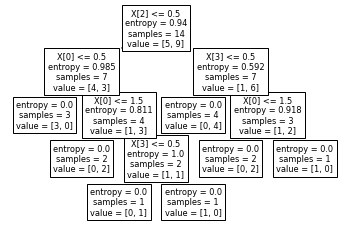

In [79]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf=clf.fit(X,y)
tree.plot_tree(clf)

[Text(0.4444444444444444, 0.9, 'X[2] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2222222222222222, 0.7, 'X[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2222222222222222, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.3, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.7, 'X[0] <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7777777777777778, 0.5, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8888

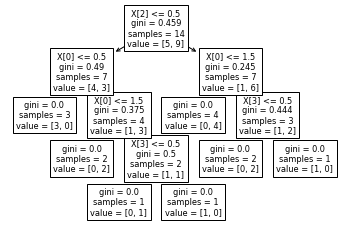

In [82]:
clf = tree.DecisionTreeClassifier()
clf=clf.fit(X,y)
tree.plot_tree(clf)

In [90]:
clf = tree.DecisionTreeClassifier()
clf=clf.fit(X,y)
print(X)
print(y)

   age income student credit_rating
0    0      2       0             0
1    0      2       0             1
2    1      2       0             0
3    2      1       0             0
4    2      0       1             0
5    2      0       1             1
6    1      0       1             1
7    0      1       0             0
8    0      0       1             0
9    2      1       1             0
10   0      1       1             1
11   1      1       0             1
12   1      2       1             0
13   2      1       0             1
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: buys_computer, dtype: object
